# Precios en Tiempos de Cólera

## Fenómeno

El fenómeno analizado en este proyecto es la suficiencia del salario mensual oficial para adquirir alimentos comercializados por las MiPymes en la actualidad. A través de la comparación entre los precios reales de mercado y los ingresos salariales, se evalúa la capacidad adquisitiva del salario y su relación con el acceso a productos básicos de consumo.

In [1]:
from modules.normalize import *
from modules.charts import *

## Escala salarial oficial

El salario mensual oficial en Cuba se organiza en **32 categorías**, numeradas del I al XXXII, según lo publicado en la Gaceta Oficial. Cada categoría representa un nivel de ingreso establecido para distintos cargos.

Esta distribución permite evaluar no solo el **salario promedio**, sino también los extremos **mínimo** y **máximo**.

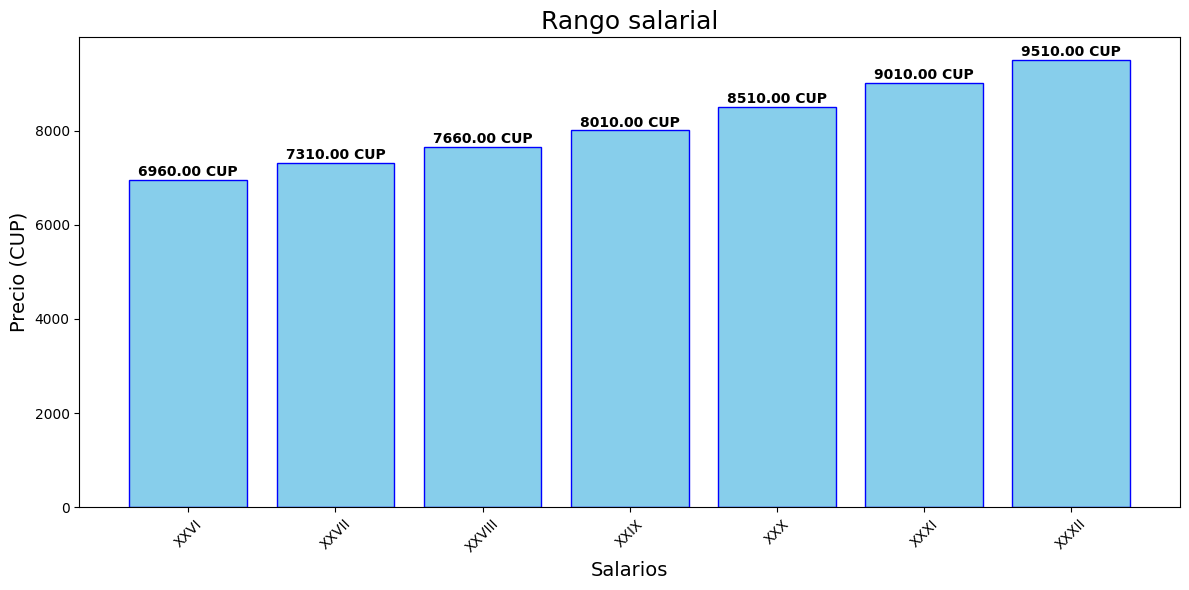

In [2]:
SalaryCategories(25, 32)

Ahora se visualizará el **mínimo**, **máximo** y **promedio**:

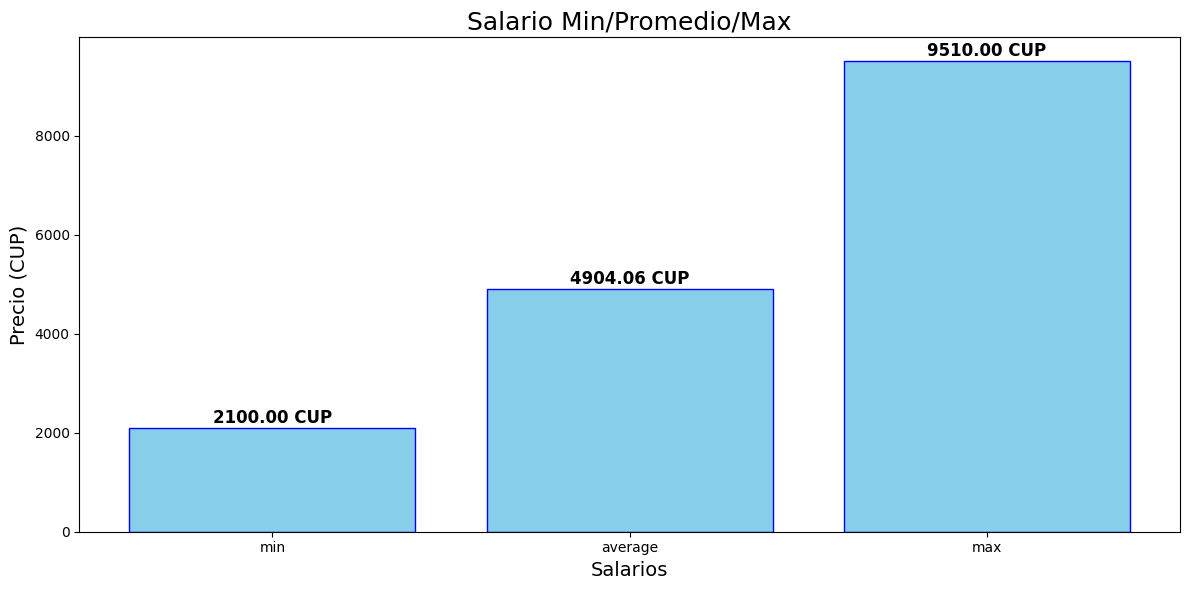

In [3]:
MinMaxAve()

En la gráfica siguiente se presentan tres indicadores clave extraídos de las 32 categorías salariales:

1. **Salario mínimo**: corresponde a la categoría I, representando el ingreso más bajo.  
2. **Salario promedio**: sirve como referencia general.  
3. **Salario máximo**: corresponde a la categoría XXXII, mostrando el ingreso más alto.

Estos valores nos permiten entender rápidamente el **rango de ingresos oficiales** y constituyen la referencia para comparar los precios de los alimentos en las MiPymes.


## Precios promedio de alimentos

A continuación se muestran los **precios promedio actuales** de los alimentos seleccionados, vendidos por las MiPymes.  

Cada barra representa el **precio promedio** de un producto. 

El gráfico permite visualizar **cuánto cuesta cada alimento** y prepara la base para analizar la **capacidad adquisitiva del salario** frente a los precios.

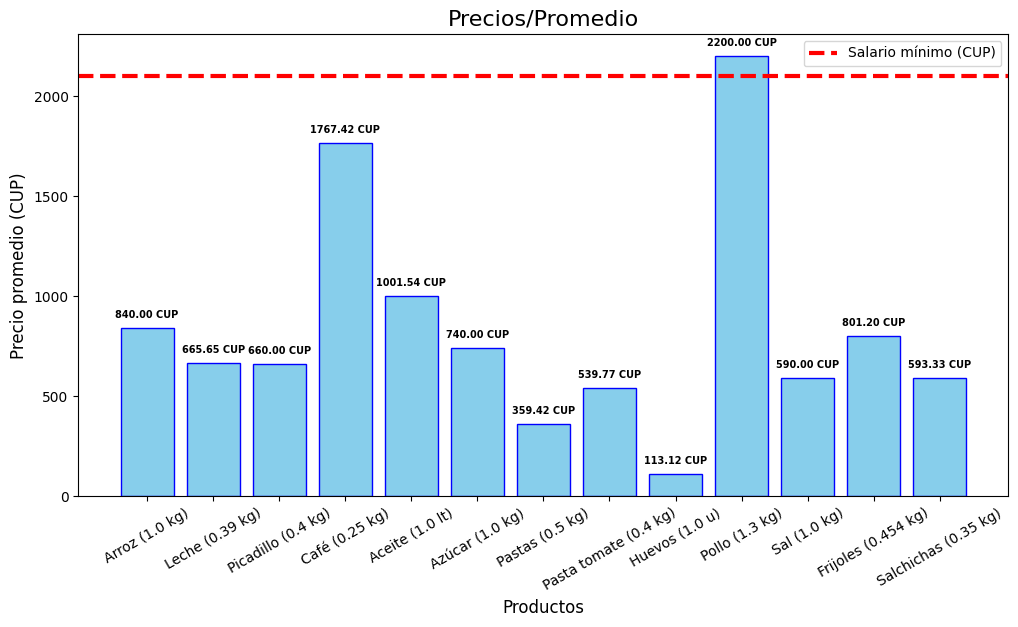

In [4]:
AverageProducts(products)

Al observar los precios promedio de los alimentos, se nota que incluso el salario  **mínimo** permite adquirir la mayoría de los productos.  Sin embargo, el **pollo** destaca como el producto más caro, y es el único alimento que **no puede ser adquirido**.  

## Dispersión de precios

El **precio promedio** de un alimento solo da una visión general, pero no refleja la **variabilidad entre las MiPymes**.

Al incluir la dispersión (precio mínimo y máximo), podemos:

- Visualizar la **desigualdad de precios** para un mismo producto.  
- Comprender que el **poder adquisitivo depende del lugar de compra**.  
- Señala la **capacidad real de compra** con el salario.  

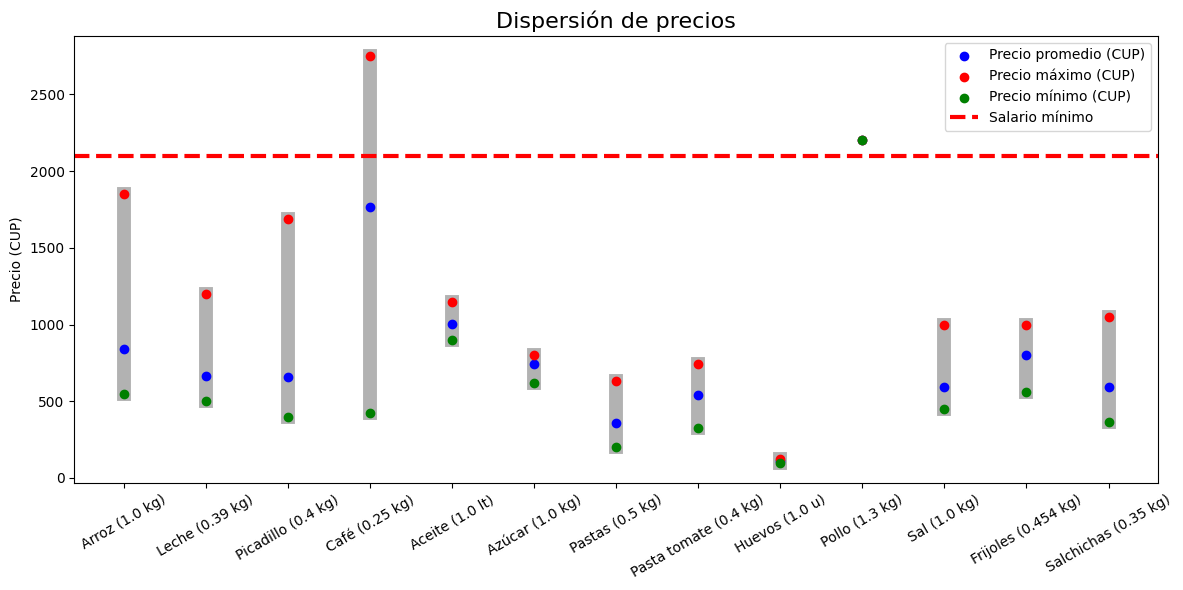

In [5]:
Dispertion(products)

Al observar el rango de precios dispersos se puede extraer:

- El **pollo sigue siendo inaccesible** para quienes perciben el salario mínimo, incluso considerando el precio más bajo registrado.  
- Varios productos muestran que sus **precios promedio** no reflejaban la realidad.  
- El **café**, que parecía asequible cuando solo se consideraba el promedio, **se vuelve inaccesible** debido a la alta variabilidad de precios.

Y dato curioso, el **pollo** no tiene ni **máximo** y **mínimo**, por qué?. Porque mantiene el mismo precio sin importar el establecimiento y la ubicación.

## Precio promedio individual

Un mismo producto puede venderse en cantidades distintas.

En esta gráfica, muestras el **precio promedio** de cada producto con su **peso** propio.

In [6]:
p = [i for i in products]
p

['arroz',
 'leche',
 'picadillo',
 'café',
 'aceite',
 'azúcar',
 'pastas',
 'pasta tomate',
 'huevos',
 'pollo',
 'sal',
 'frijoles',
 'salchichas']

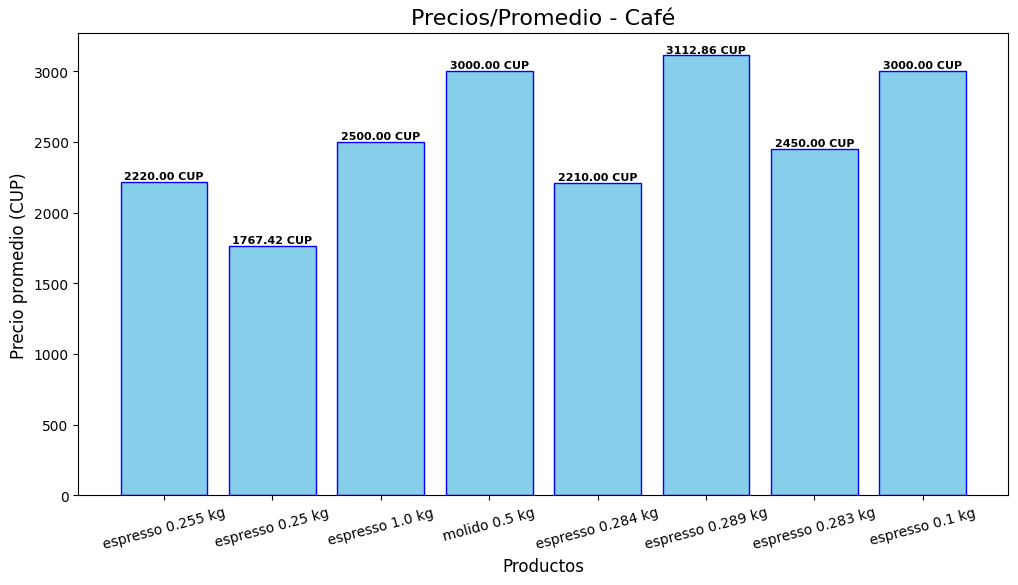

In [7]:
Individual('café') # Escriba uno de los productos de la celda superior

Se evidencia **precio promedio** distintos, dependiendo del **peso** de venta.

Se observa que algunos productos que aparentaban ser **accesibles**, resultan **costosos**.

El resultado explica la dispersión observada en la gráfica anterior y analiza los precios desde una perspectiva individual.

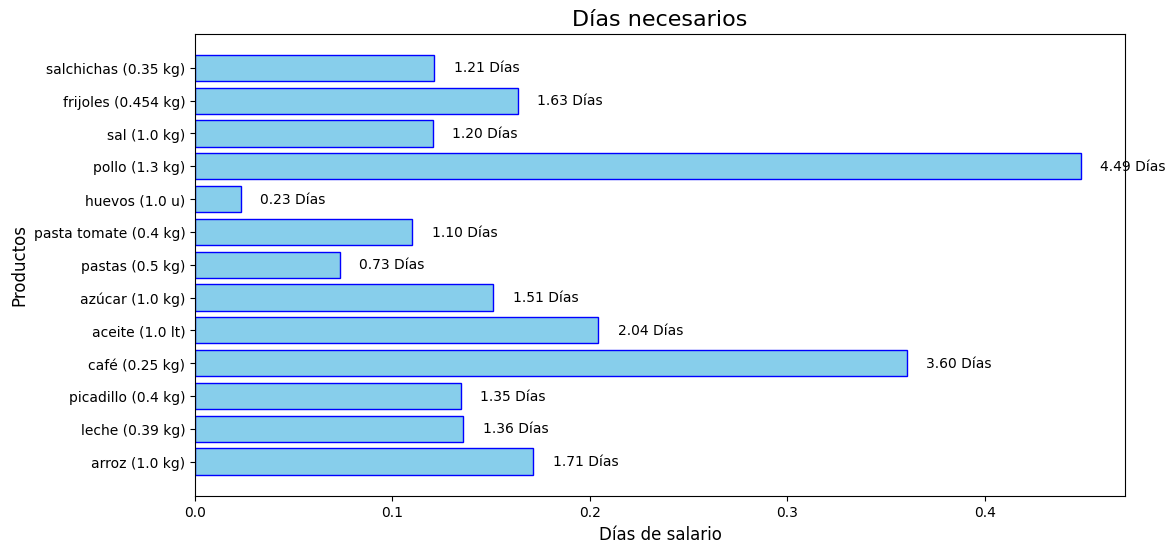

In [9]:
Days(1)